# Lecture 04

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm

In [2]:
anscombe_data = pd.read_csv("anscombe.csv",index_col="id")


## Visualization demo

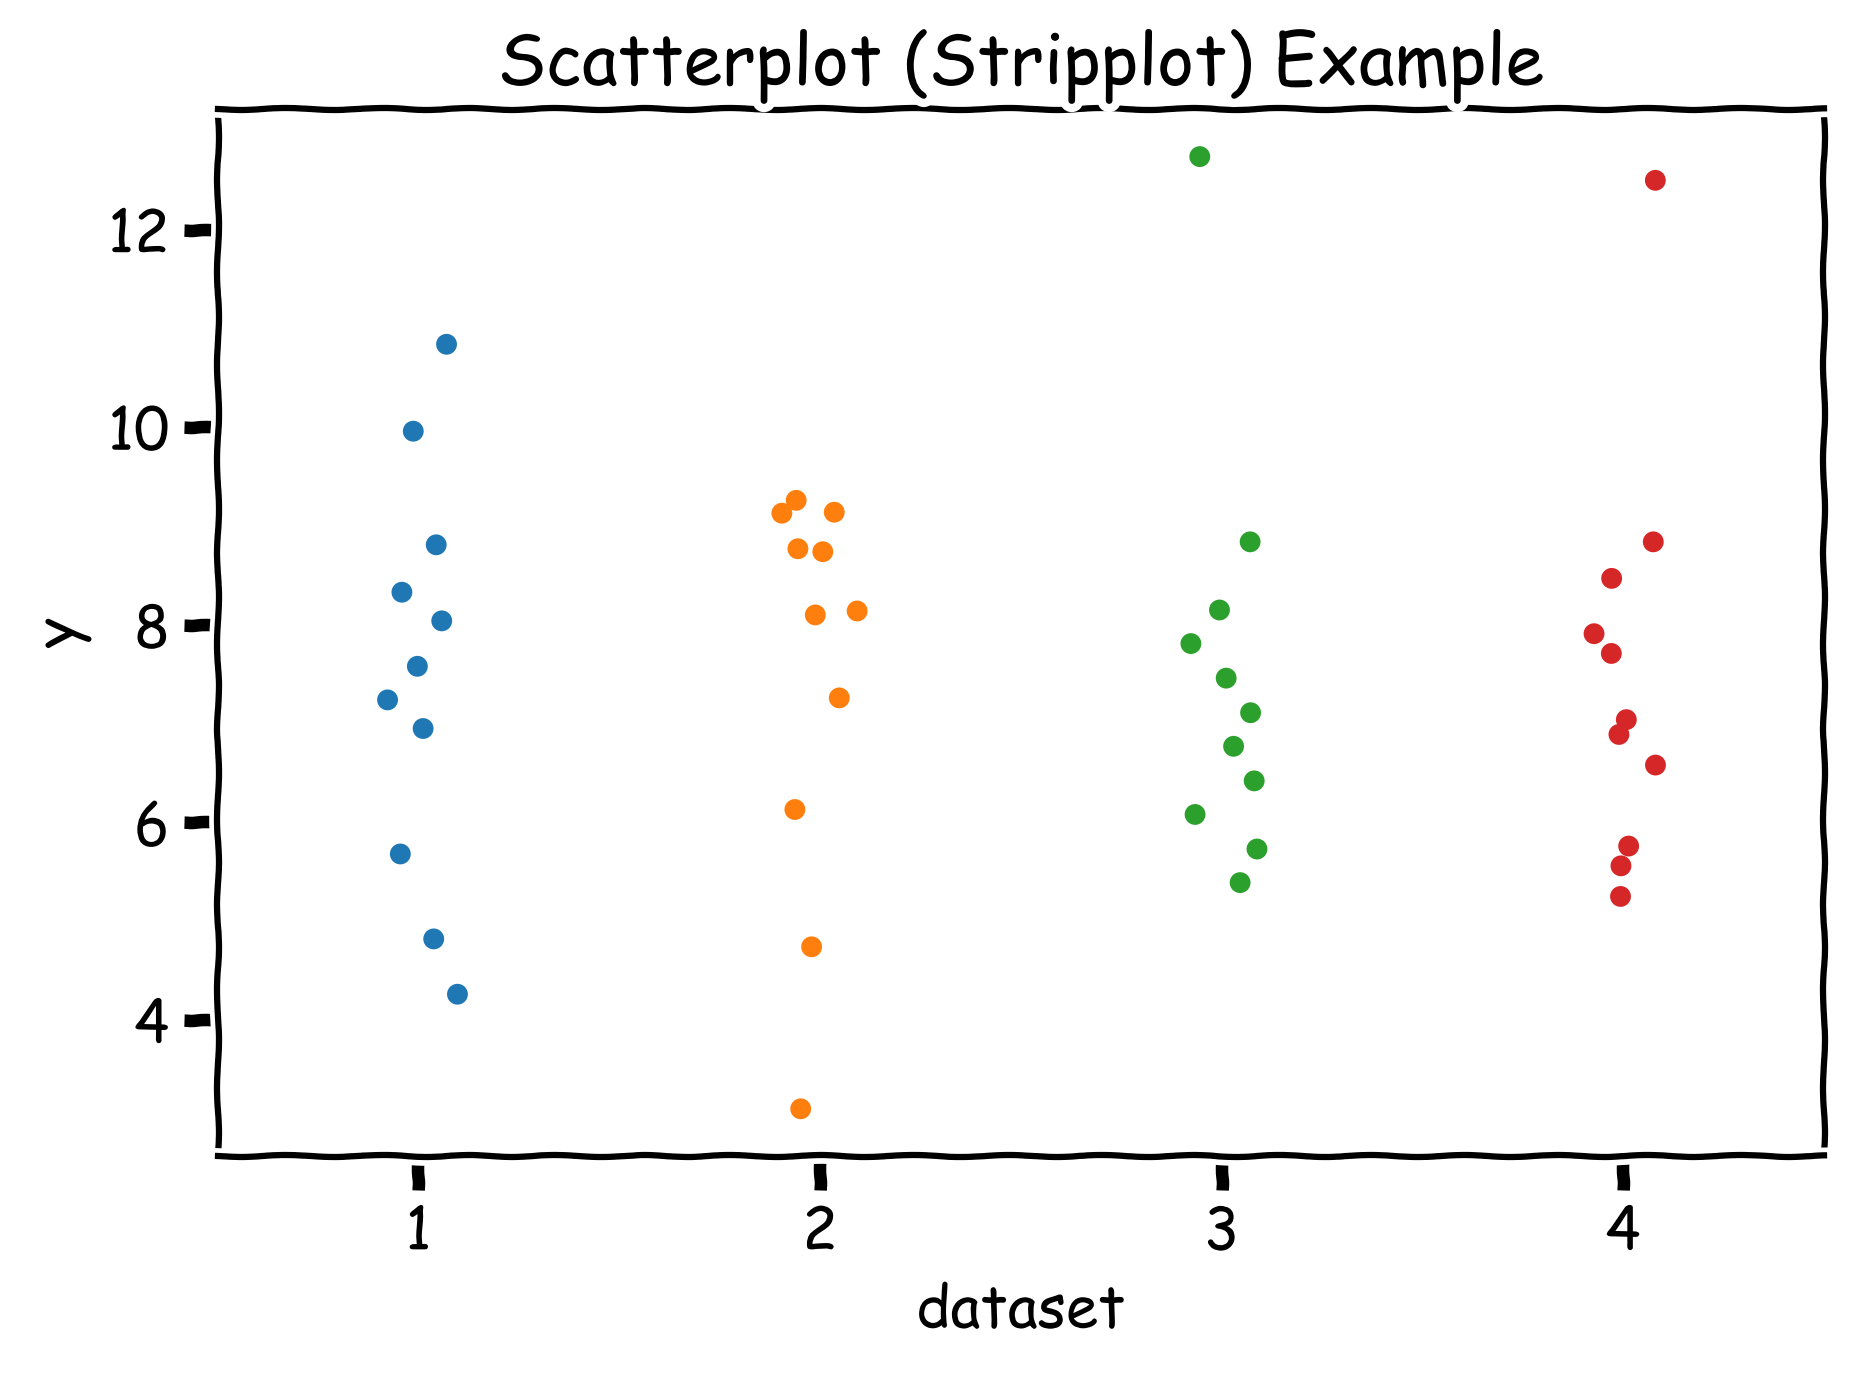

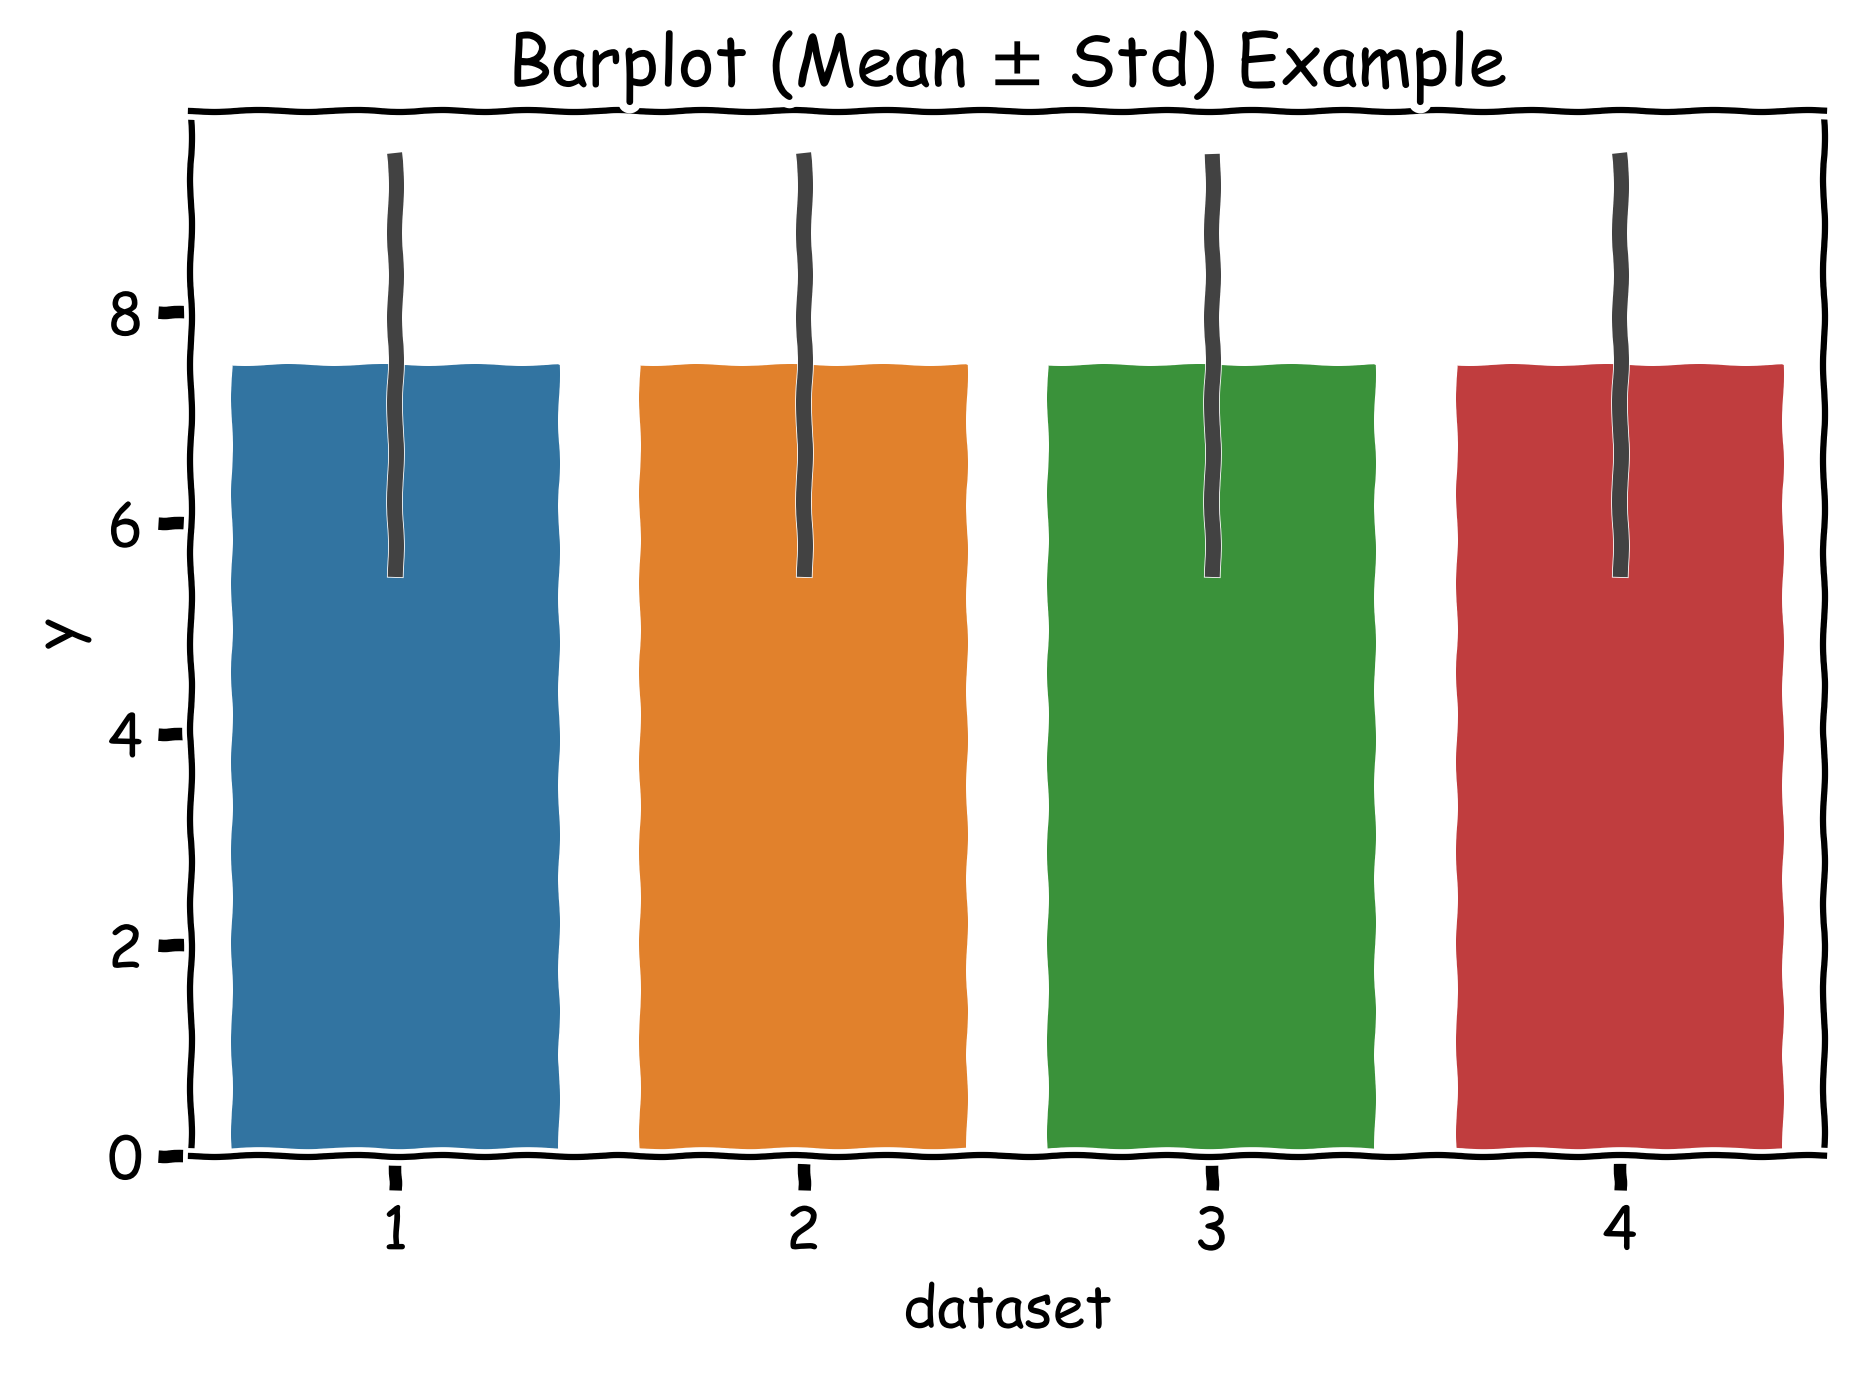

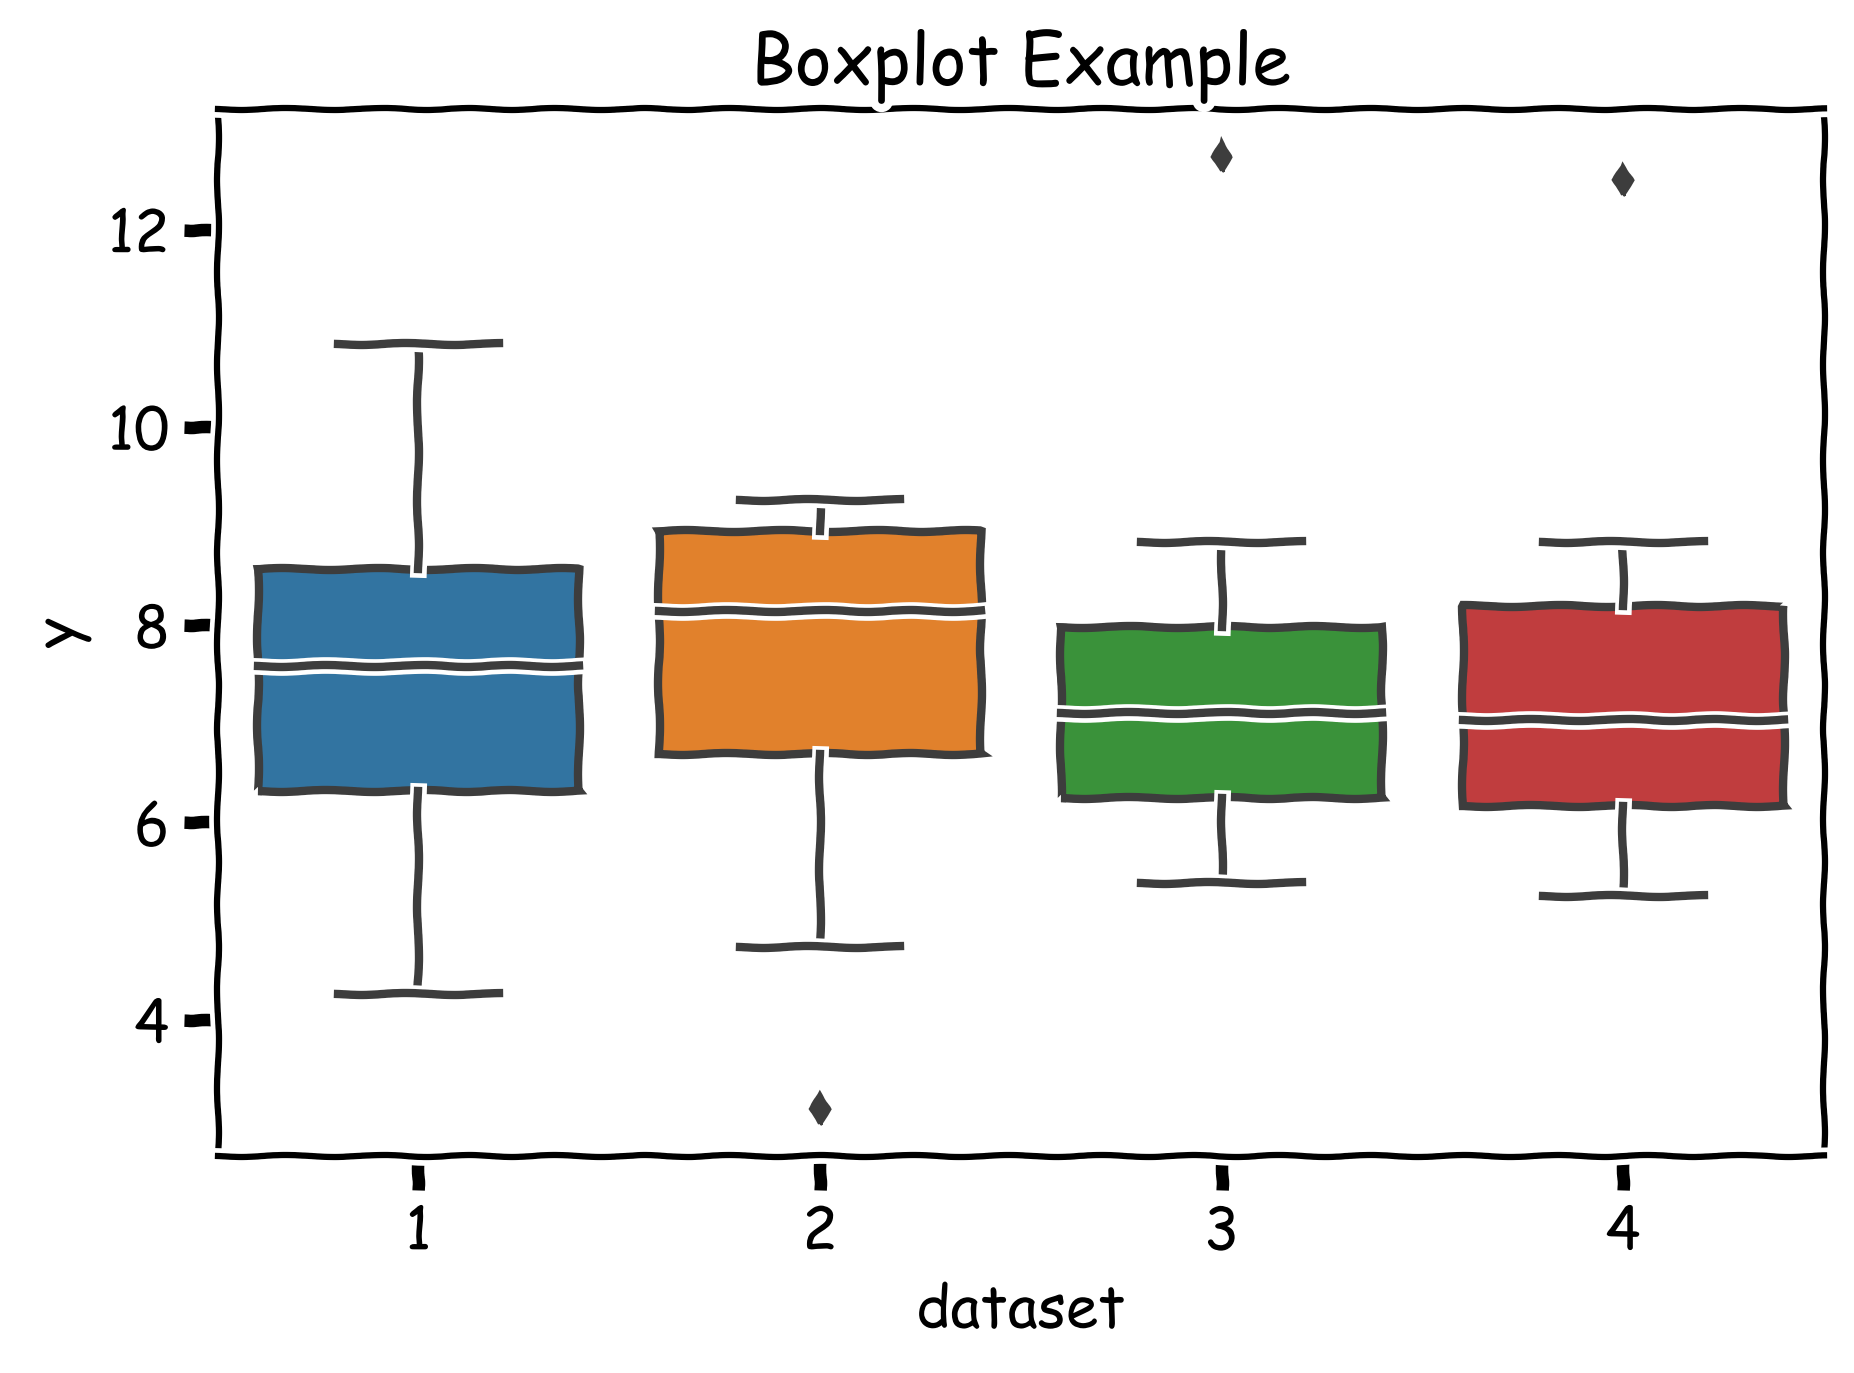

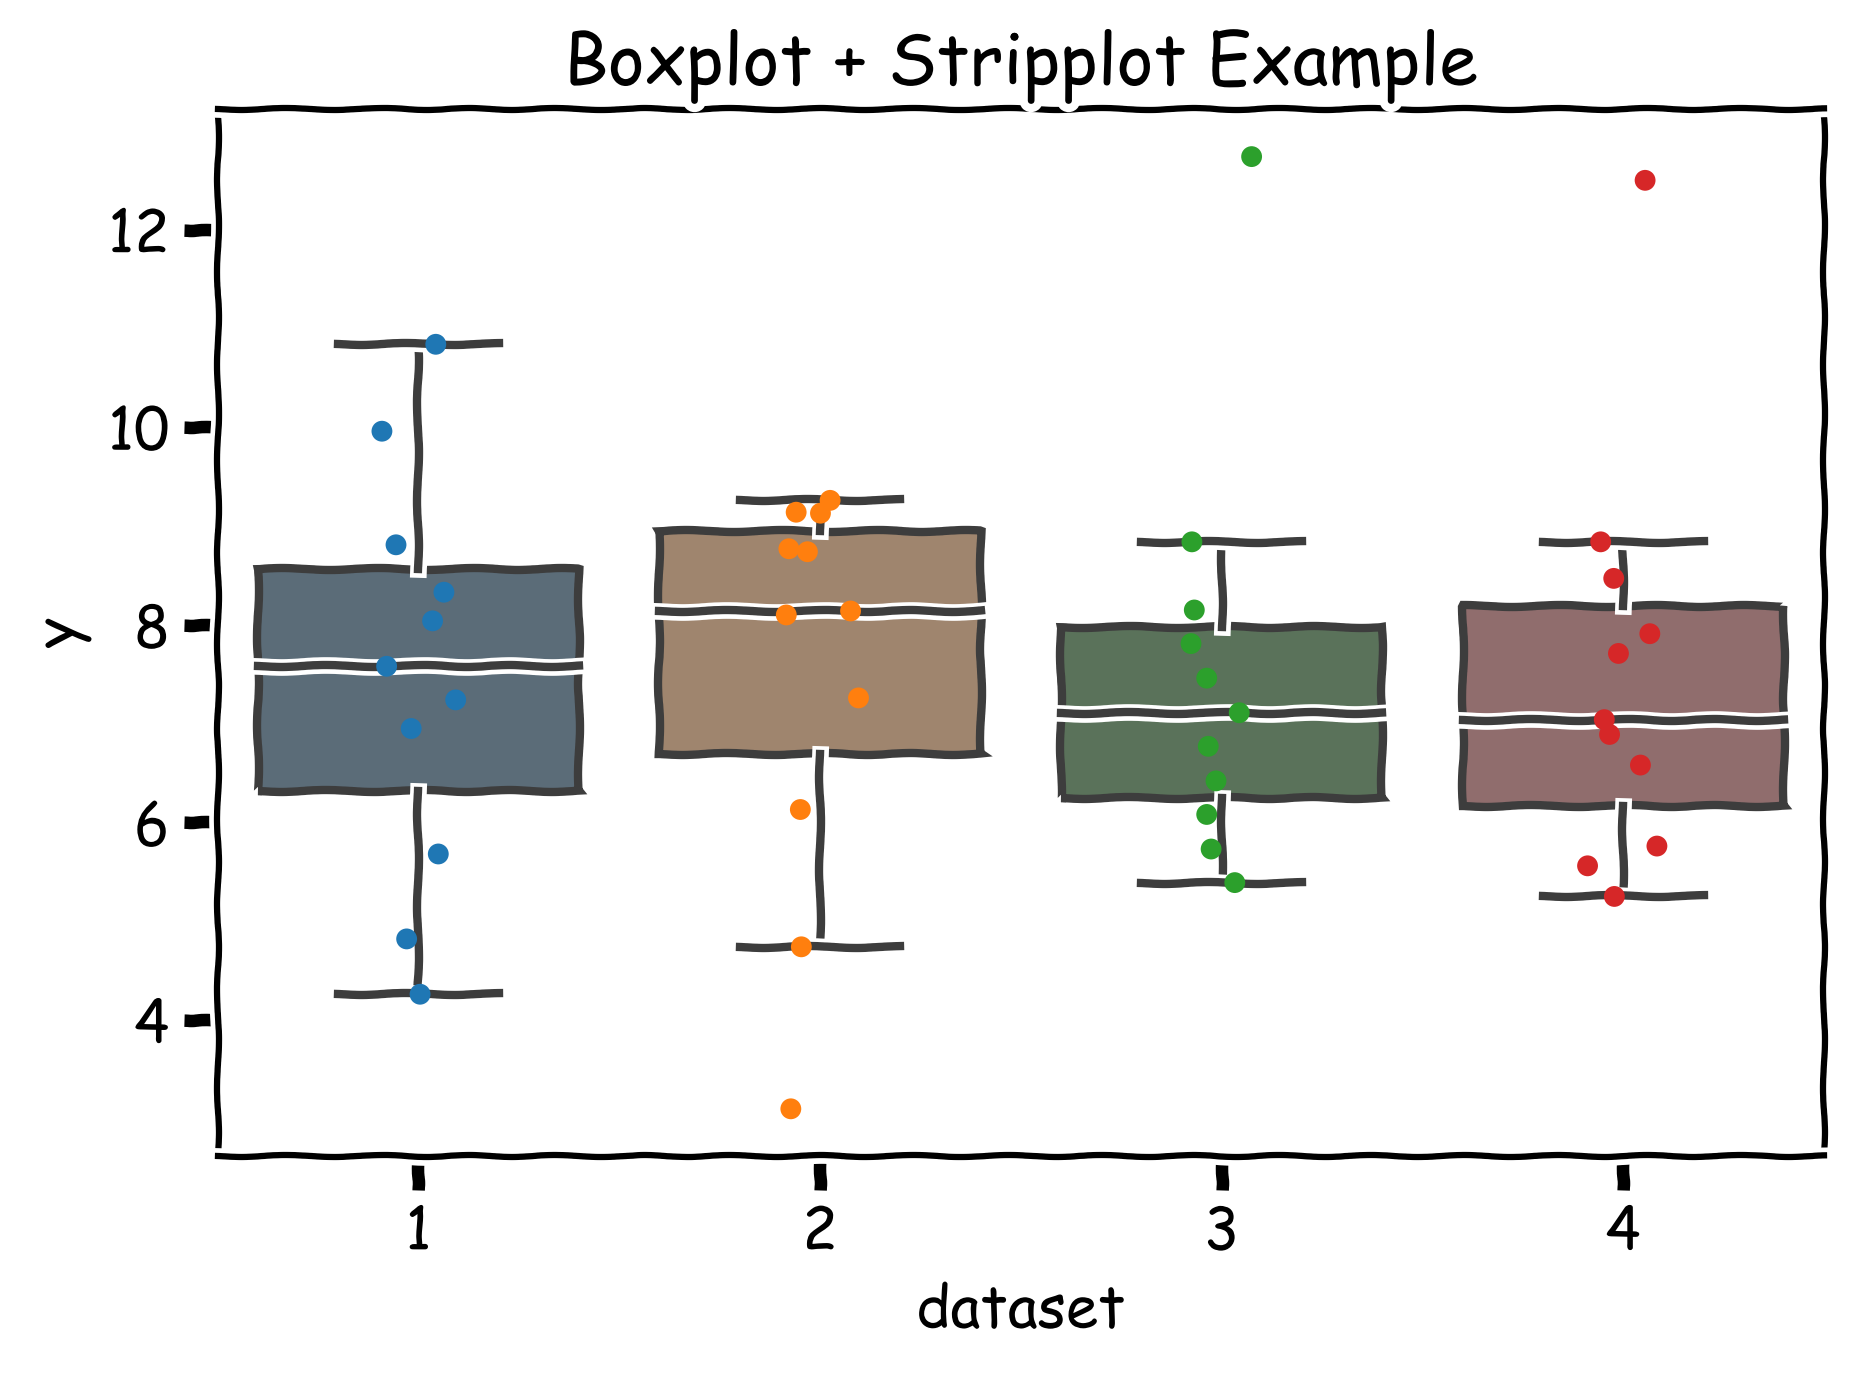

In [3]:
save = False

plt.xkcd()

strip = plt.figure(dpi=300, figsize=[6.4, 4.8])
sns.stripplot(data=anscombe_data, x="dataset", y="y")
plt.title("Scatterplot (Stripplot) Example")
plt.tight_layout()
if save:
    plt.savefig("../images/lecture04/strip.png")

bar = plt.figure(dpi=300, figsize=[6.4, 4.8])
sns.barplot(data=anscombe_data, x="dataset", y="y", ci="sd")
plt.title("Barplot (Mean $\pm$ Std) Example")
plt.tight_layout()
if save:
    plt.savefig("../images/lecture04/bar.png")

box = plt.figure(dpi=300, figsize=[6.4, 4.8])
sns.boxplot(data=anscombe_data, x="dataset", y="y")
plt.title("Boxplot Example")
plt.tight_layout()
if save:
    plt.savefig("../images/lecture04/box.png")

box_strip = plt.figure(dpi=300, figsize=[6.4, 4.8])
# remove the boxplot's own outliers (fliers) and desaturate for visibility
sns.boxplot(data=anscombe_data, x="dataset", y="y", fliersize=0, saturation=0.2)
# use stripplot to show raw data
sns.stripplot(data=anscombe_data, x="dataset", y="y")
plt.title("Boxplot + Stripplot Example")
plt.tight_layout()
if save:
    plt.savefig("../images/lecture04/box_strip.png", bbox_inches = "tight")

plt.show()


[0.5000000000000004, 0.00499523405704682, 2.452343697365033e-07]
[0.0, 0.9179970636694477, 1.9033181667103543]


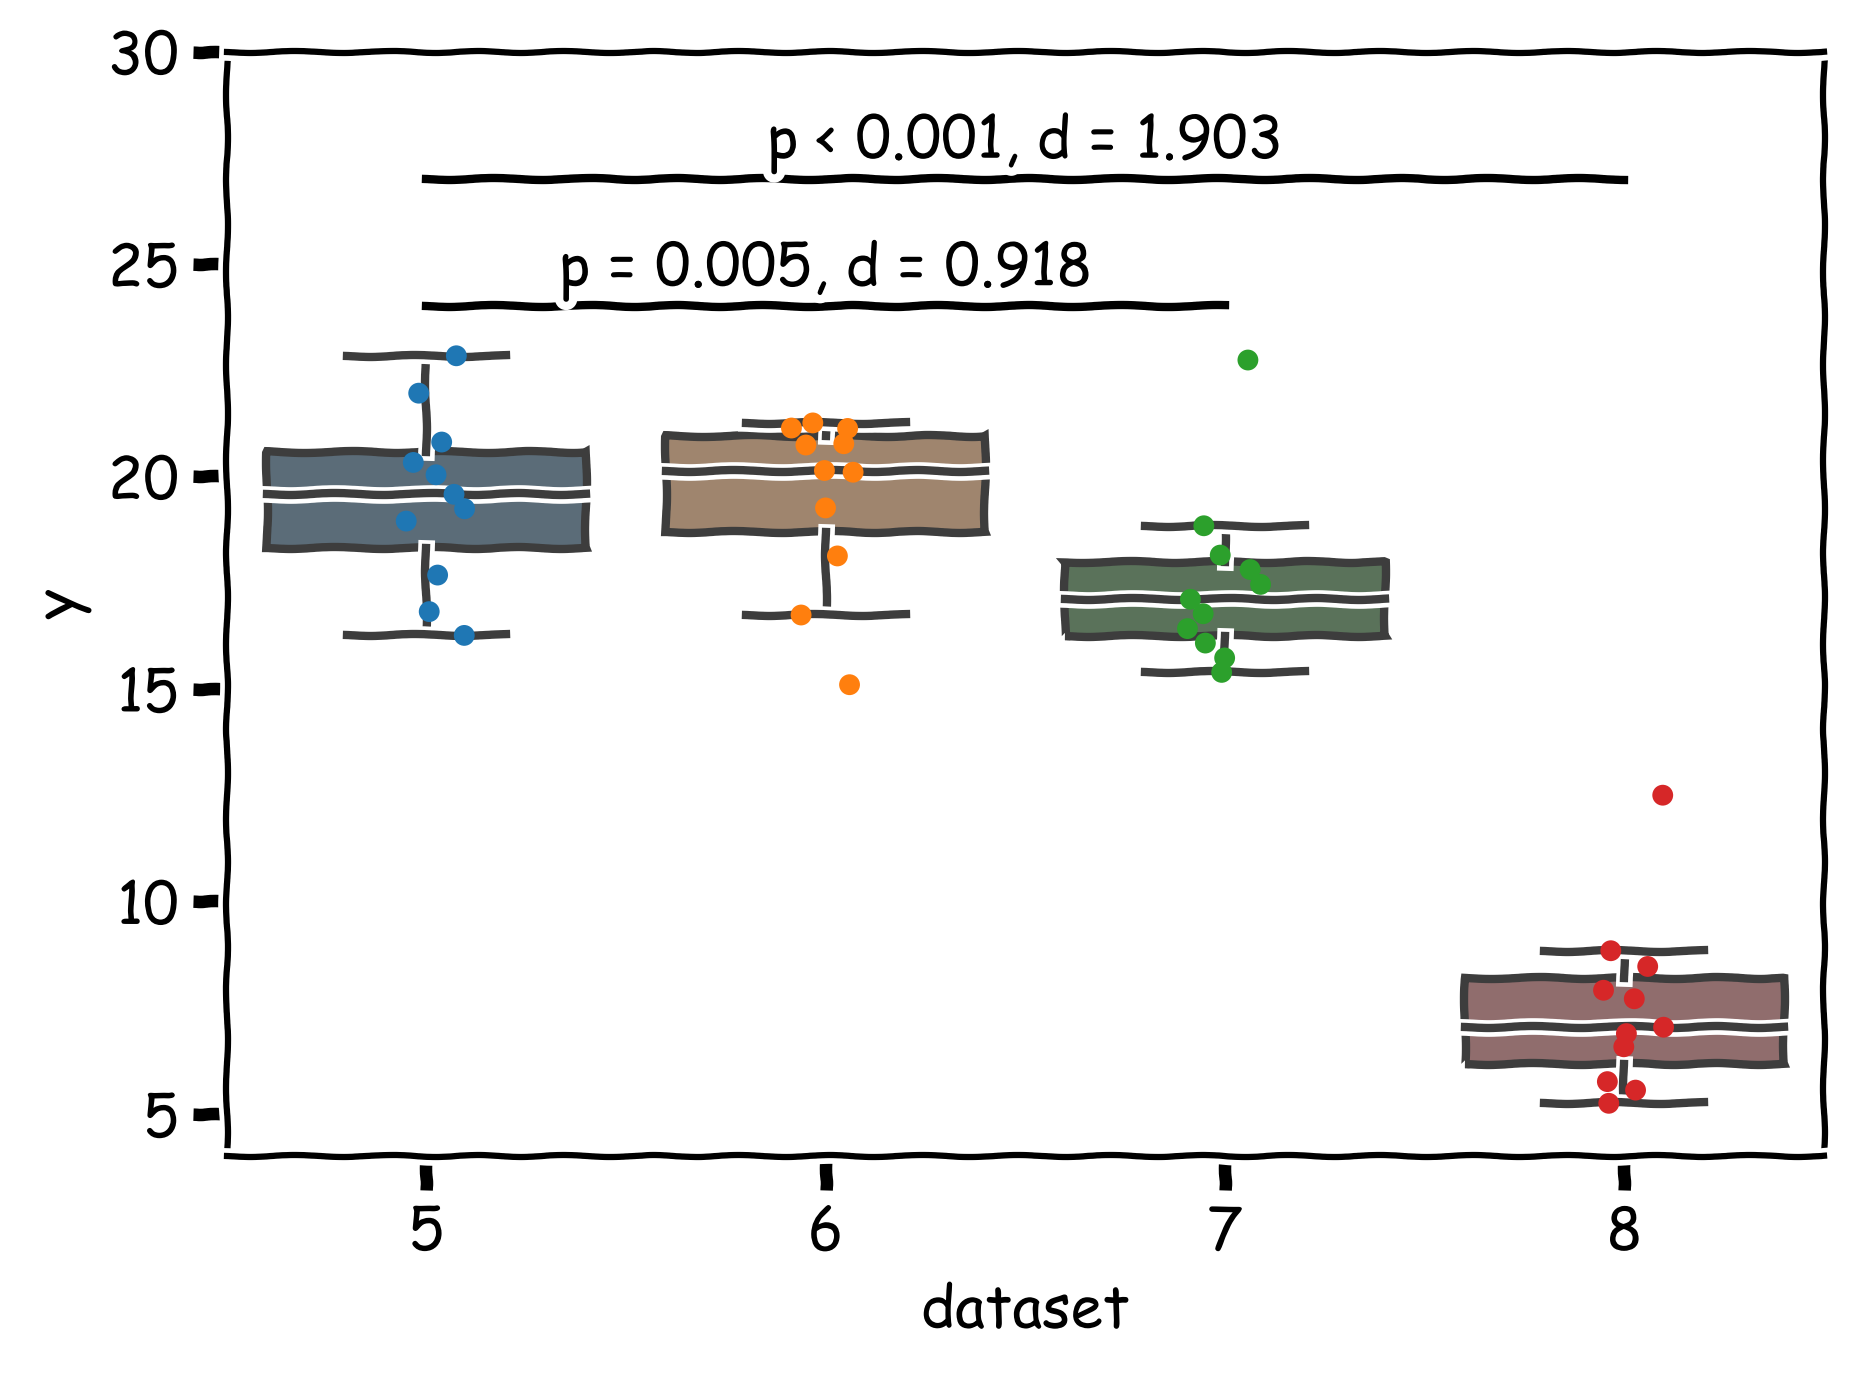

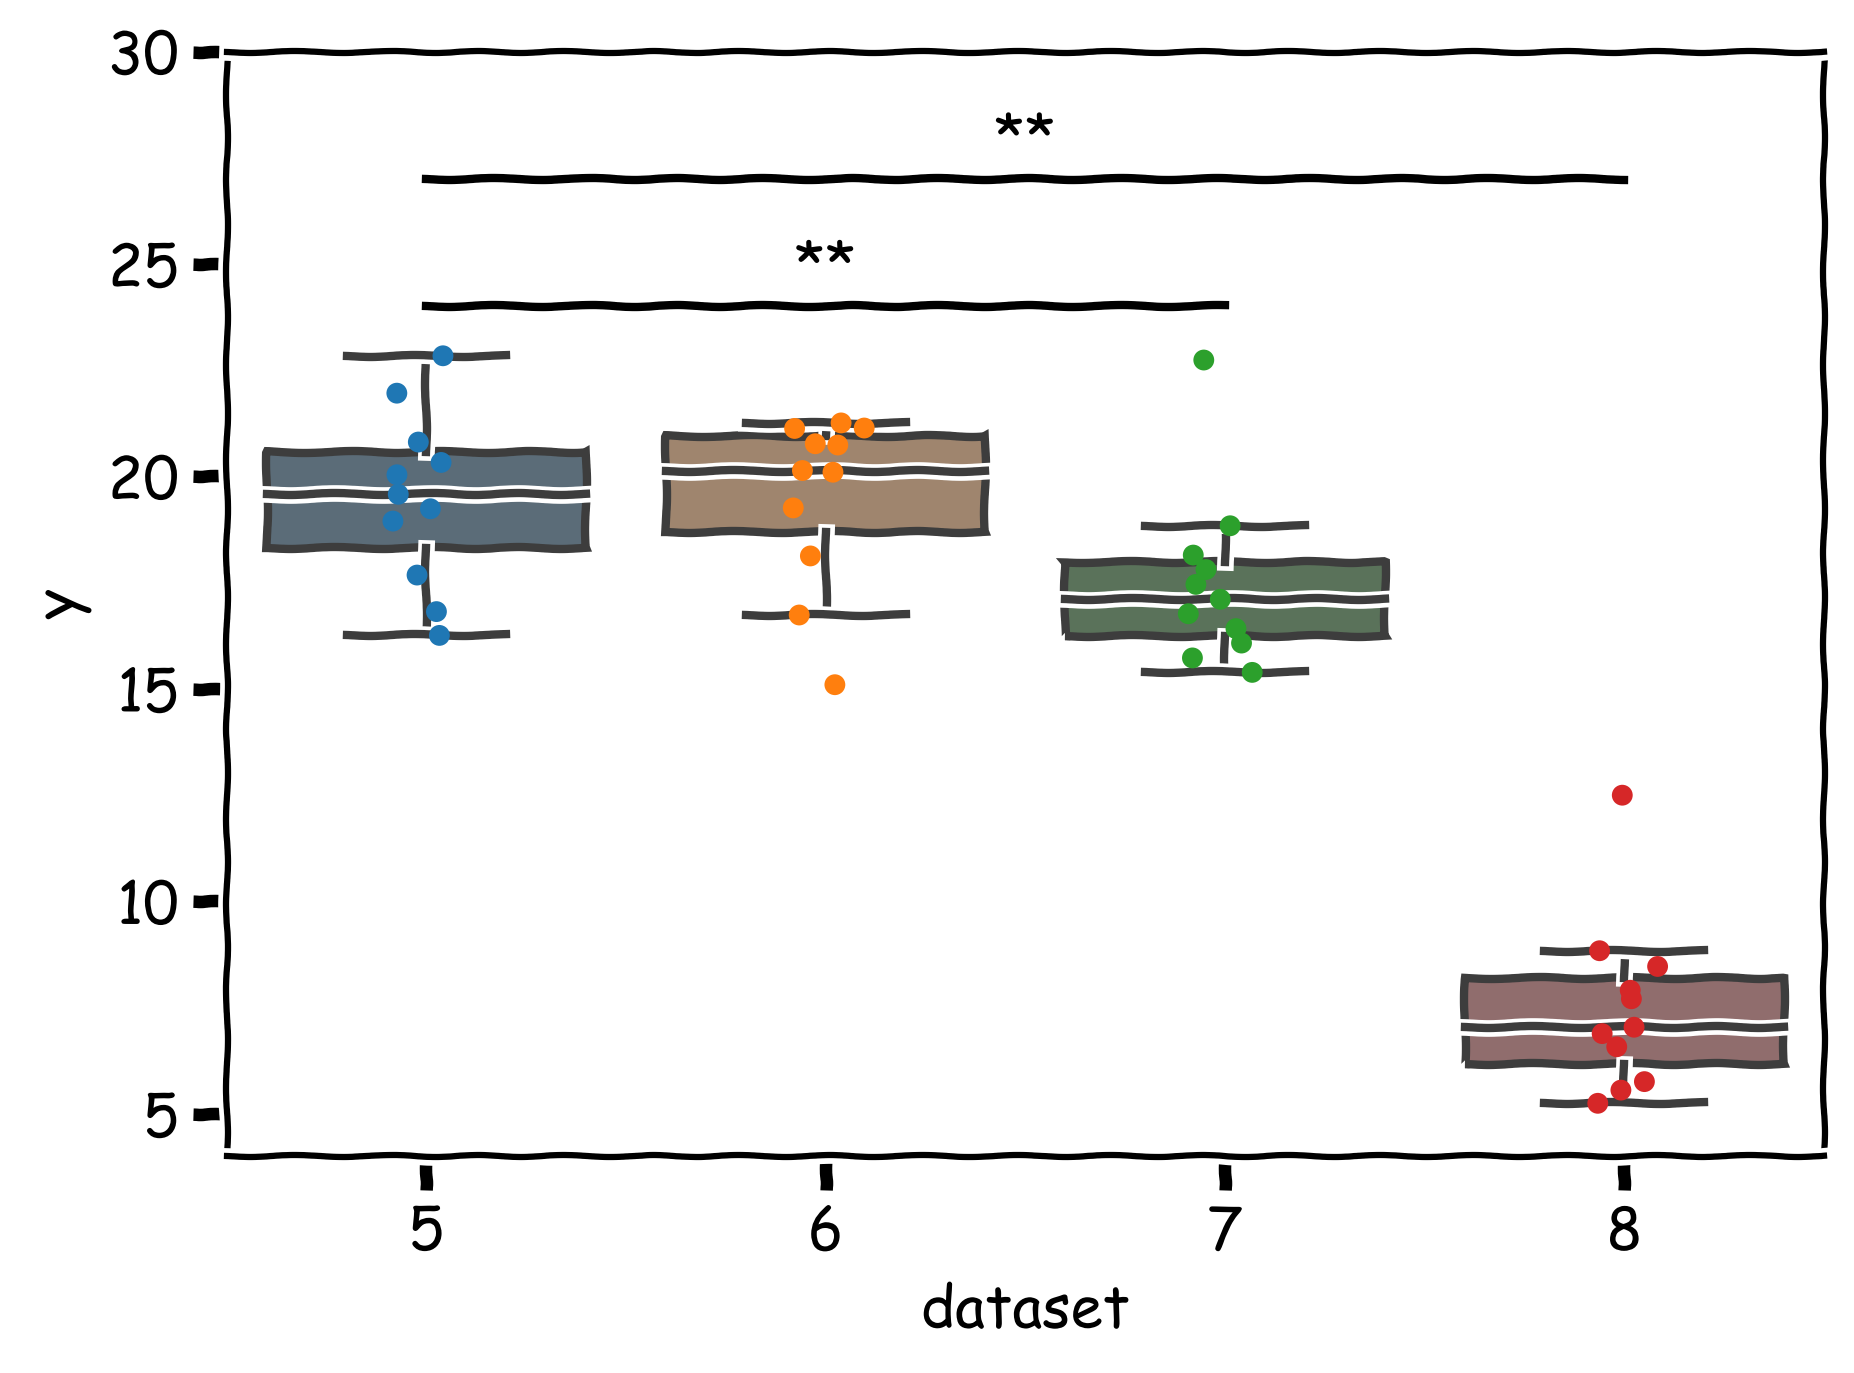

In [35]:
save = True

shifted_anscombe = anscombe_data.copy()
shifted_anscombe.loc[shifted_anscombe["dataset"]==1,"y"] += 12
shifted_anscombe.loc[shifted_anscombe["dataset"]==2,"y"] += 12
shifted_anscombe.loc[shifted_anscombe["dataset"]==3,"y"] += 10
shifted_anscombe.loc[shifted_anscombe["dataset"]==4,"y"] += 0  # just for clarity

alpha = 0.05/3
p_array = []
t_array = []
d_array = []

for i in range(2,5):
    data1 = shifted_anscombe.loc[shifted_anscombe["dataset"]==1,"y"]
    data2 = shifted_anscombe.loc[shifted_anscombe["dataset"]==i,"y"]

    # scipy stats' paired t-test function
    result = stats.ttest_rel(data1, data2, alternative="greater")

    p_array.append(result.pvalue)
    t_array.append(result.statistic)
    d_array.append((np.mean(data1)-np.mean(data2))/np.std([data1,data2]))

print(p_array)
print(d_array)

shifted_viz = plt.figure(dpi=300, figsize=[6.4, 4.8])
sns.boxplot(data=shifted_anscombe, x="dataset", y="y", fliersize=0, saturation=0.2)
sns.stripplot(data=shifted_anscombe, x="dataset", y="y")

sig_bars = 0
for i in range(3):
    if p_array[i] < alpha:
        plt.plot([0,i+1],[24+sig_bars*3,24+sig_bars*3],'k')

        d_rounded = np.round(d_array[i],3)
        h_location = (i+1)/2

        if p_array[i] < 0.001:
            text_notes = f"p < 0.001, d = {d_rounded}" 
        else:
            p_rounded = np.round(p_array[i],3)
            text_notes = f"p = {p_rounded}, d = {d_rounded}"
            
        plt.text(h_location,24.5+sig_bars*3,text_notes,ha="center")
        sig_bars += 1

plt.xticks([0,1,2,3],labels=[5, 6, 7, 8])
plt.xlabel("dataset")
plt.ylabel("y")
plt.ylim(4,30)
plt.tight_layout()
if save:
    plt.savefig("../images/lecture04/sig_bars.png")

shifted_viz_astrisks = plt.figure(dpi=300, figsize=[6.4, 4.8])
sns.boxplot(data=shifted_anscombe, x="dataset", y="y", fliersize=0, saturation=0.2)
sns.stripplot(data=shifted_anscombe, x="dataset", y="y")

sig_bars = 0
for i in range(3):
    if p_array[i] < alpha:
        plt.plot([0,i+1],[24+sig_bars*3,24+sig_bars*3],'k')

        d_rounded = np.round(d_array[i],3)
        h_location = (i+1)/2

        text_notes = f"**" 

        plt.text(h_location,24.5+sig_bars*3,text_notes,ha="center")
        sig_bars += 1

plt.xticks([0,1,2,3],labels=[5, 6, 7, 8])
plt.xlabel("dataset")
plt.ylabel("y")
plt.ylim(4,30)
plt.tight_layout()
if save:
    plt.savefig("../images/lecture04/sig_bars_with_asterisks.png")



ANOVA illustration

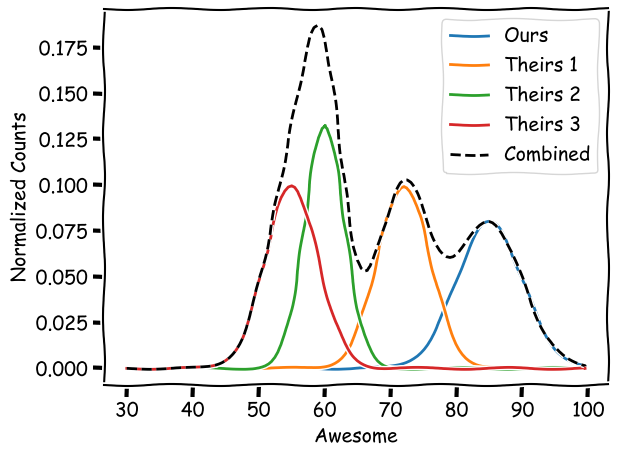

In [33]:
save = True

x = np.arange(30,100,0.5)
dist1 = norm.pdf(x, 85, 5)
dist2 = norm.pdf(x, 72, 4)
dist3 = norm.pdf(x, 60, 3)
dist4 = norm.pdf(x, 55, 4)
plt.plot(x, dist1)
plt.plot(x, dist2)
plt.plot(x, dist3)
plt.plot(x, dist4)
plt.plot(x, dist1+dist2+dist3+dist4, "k--")
plt.legend(["Ours", "Theirs 1", "Theirs 2", "Theirs 3", "Combined"])
plt.xlabel("Awesome")
plt.ylabel("Normalized Counts")
plt.tight_layout()
if save:
    plt.savefig("../images/lecture04/anova_illustration.png")